In [1]:
# Using Keras to create a 10 neurons and single layer NN
# Against the MNIST databesa

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
nb_classes = 10

np.random.seed(42)
%matplotlib notebook

Using TensorFlow backend.


X_train original shape (60000, 28, 28)
y_train original shape (60000,)


<IPython.core.display.Javascript object>


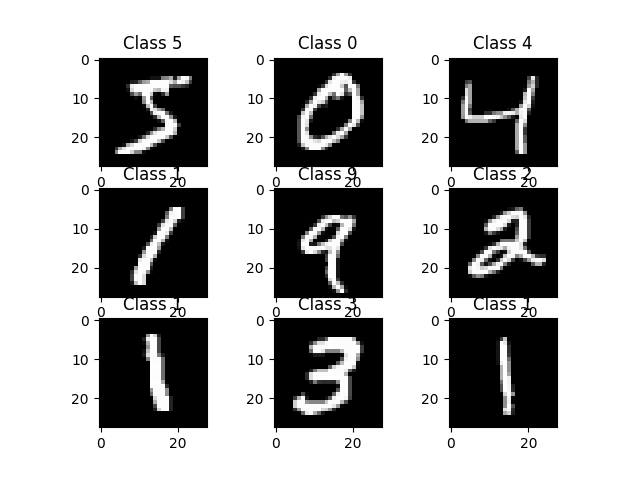

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

# Swish activation function
# x*sigmoid(x)
def swish(x):
    return x*K.sigmoid(x)

# Custom activation function 1
# mix between relu and positive part of swish mirrored across x=1
def leaky(x):
    return K.maximum(0.3*x, x)

# Custom activation function 2
# positive part of swish mirrored across x=1
def e_swish_2(x):
    return K.maximum(x*K.sigmoid(x), x*(2-K.sigmoid(x)))

show(X_train, y_train)

# Reshape arrays
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
activations = [e_swish_1, e_swish_2, swish, "relu", "elu", leaky] #  "sigmoid", "tanh"
names = activations[:]
for i,a in enumerate(names):
    if not isinstance(a, str):
        names[i] = a.__name__
print(names)

['e_swish_1', 'e_swish_2', 'swish', 'relu', 'sigmoid', 'tanh']


In [ ]:
def accuracy(y_pred, y_test):
    y_hat = np.argmax(y_pred, axis=1)
    y = np.argmax(y_test, axis=1)

    good = np.sum(np.equal(y, y_hat))
    return float(good/len(y_test))

In [5]:
def create(act):
    models = []

    sgd = SGD(lr=0.1)
    # create model
    
        model1 = Sequential()
        model1.add(Dense(200, input_dim=784, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(100, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(60, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(30, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(10, activation='softmax'))

    # Compile model
    model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model1

In [ ]:
# Configure logs
import logging

# Record settings
LOG_FORMAT = "%(levelname)s %(asctime)s - %(message)s"
logging.basicConfig(filename="swish_first_exp_log.txt",format = LOG_FORMAT, level = logging.DEBUG, filemode = "a")
logs = logging.getLogger()

In [ ]:
import gc
for i,act in enumerate(activations):
    logs.info("\n \n Starting traiing for "+names[i])
    ensembler = 0
    logger = [names[i]]
    for i in range(3):
        gc.collect()
        model = create(act)
        his = model.fit(X_train, Y_train, epochs=15, batch_size=64,  verbose=1, validation_data=(X_test, Y_test))
        # Record accuracy of each model and save it
        logger.append(model.evaluate(X_test, Y_test)[1])
        # Calculate probabilities of test data and sum them toghether
        ensembler += model.predict_proba(X_test)
        # Clear session (GPU MEMORY)
        K.get_session().close()
        K.set_session(K.tf.Session())
        del model, his
        
    # Calculate the median accuracy
    ensembled = accuracy(ensembler, Y_test)
    print(ensembled)
    logs.info(str(logger))
    logs.info(str(ensembled))
    del ensembler, ensembled

In [6]:
def test_against(models, epochs, acc):
   
        
    for j in range(epochs):
        for i,model in enumerate(models):
            print("Training model {0}".format(i))
            model.fit(X_train, Y_train, epochs=1, batch_size=64,  verbose=1, validation_data=(X_test, Y_test))
            scores = model.evaluate(X_test, Y_test)
            acc[i].append(scores[1]*100)
        print("///////////////////////////////////////////////")
        print("/////////////////////{0}//////////////////////////".format(j))
        print("///////////////////////////////////////////////")

    return models, acc

# Plot the evolution of the accuracies
def plot_results(accs):
	plt.figure()
	for acc in accs:
		plt.plot(acc)
	plt.grid()
	plt.legend(names, loc='upper left')
	plt.show()

In [7]:
kernels, acc = create_models()

In [8]:
kernels, acc = test_against(kernels, 20, acc)
# kernels_, acc = test_against(kernels_, 20, acc)

Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9408/10000 [===========================>..] - ETA: 0sTraining model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9920/10000 [============================>.] - ETA: 0sTraining model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9344/10000 [===========================>..] - ETA: 0sTraining model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9664/10000 [===========================>..] - ETA: 0sTraining model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9760/10000 [============================>.] - ETA: 0sTraining model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 0s     
///////////////////////////////////////////////
/////////////////////0//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 samples, validate on 10000 samples
E

 9344/10000 [===========================>..] - ETA: 0sTraining model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9632/10000 [===========================>..] - ETA: 0sTraining model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9248/10000 [==========================>...] - ETA: 0sTraining model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9696/10000 [============================>.] - ETA: 0sTraining model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9856/10000 [============================>.] - ETA: 0sTraining model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9600/10000 [===========================>..] - ETA: 0s///////////////////////////////////////////////
/////////////////////5//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9760/10000 [============================>.] - ETA: 0sTraining model 

 9184/10000 [==========================>...] - ETA: 0sTraining model 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9568/10000 [===========================>..] - ETA: 0sTraining model 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9600/10000 [===========================>..] - ETA: 0sTraining model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9440/10000 [===========================>..] - ETA: 0sTraining model 4
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9824/10000 [============================>.] - ETA: 0sTraining model 5
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9248/10000 [==========================>...] - ETA: 0s///////////////////////////////////////////////
/////////////////////15//////////////////////////
///////////////////////////////////////////////
Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 9952/10000 [============================>.] - ETA: 0sTraining model

<IPython.core.display.Javascript object>


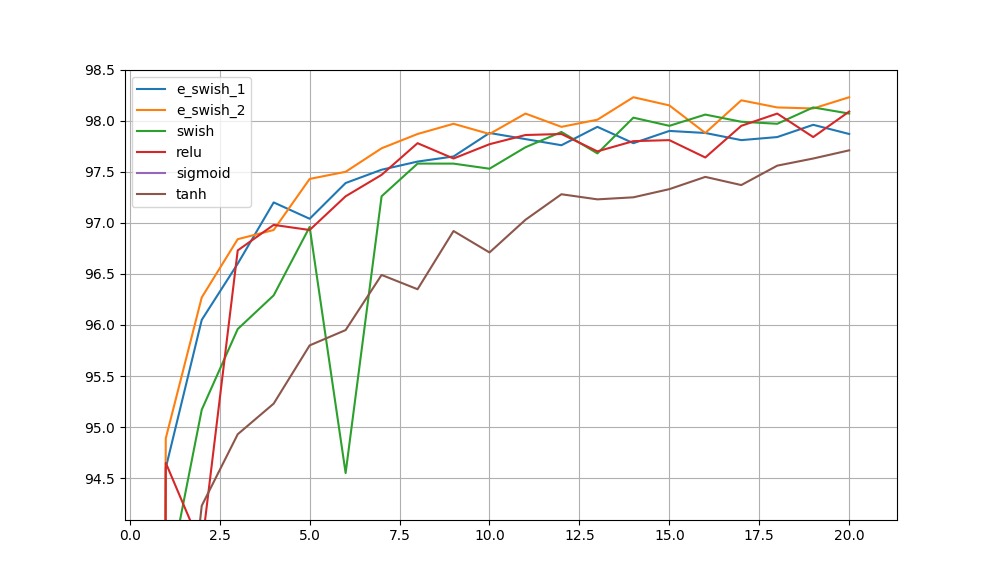

In [9]:
plot_results(acc)